## Logistic Regression 

Logistic regression is another technique borrowed by machine learning from the field of statistics.


### Mathematical Foundations

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$1 / (1 + e^{-value})$$

Where $e$ is the base of the natural logarithms (Euler’s number or the EXP()) and value is the actual numerical value that you want to transform. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.

<img src="log_curve.png" alt="Drawing" style="width: 500px;"/>

### Representation Used for Logistic Regression

Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

$$y = \frac{e^{\beta_0 + \beta_1*x_1} }{1 + e^{\beta_0 + \beta_1*x_1}}$$

Multiple ligistic regression:

$$y = \frac{e^{\beta_0 + \beta_1*x_1 + \beta_2*x_2} }{1 + e^{\beta_0 + \beta_1*x_1+ \beta_2*x_2}}$$


Where y is the predicted output, $\beta_0$ is the bias or intercept term and $\beta_1$ is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.

The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

Linear regression:

$$ y = a_1x_1 +a_2x_2 +\dots$$

### Learning the Logistic Regression Model

The coefficients (beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using maximum-likelihood estimation.

**Maximum-likelihood estimation** is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data.


### Making Predictions with Logistic Regression

Making predictions with a logistic regression model is as simple as plugging in numbers into the logistic regression equation and calculating a result.

#### Example

Let’s say we have a model that can predict whether a person is male or female based on their height. Given a height of 150cm we want to predict if the person male or female.

Suppose we have the coefficients of b0 = -100 and b1 = 0.6. Using the equation above we can calculate the probability of male given a height of 150cm or more formally P(male|height=150). 

$$y = \frac{e^{\beta_0 + \beta_1*x} }{1 + e^{\beta_0 + \beta_1*x}}$$

$$y = \frac{e^{-100 + 0.6*150} }{ 1 + e^{-100 + 0.6*150}}$$

$$y = 0.0000453978687$$

Or a probability of near zero that the person is a male.

In practice we can use the probabilities directly. Because this is classification and we want a crisp answer, we can map the probabilities to a binary class value, for example:

0 if p(male) < 0.5

1 if p(male) >= 0.5

Now that we know how to make predictions using logistic regression, let’s look at how we can prepare our data to get the most from the technique.

## Logistic Regression in Python

The dataset we will be using  is related to the disaster of the [Titanic]{https://www.kaggle.com/c/titanic}.

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")




#### Basic EDA

In [3]:
# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))


The number of samples into the train data is 891.


There is no target variable into test data (i.e. "Survival" column is missing), so the goal is to predict this target using  logistic regression.

#### Data Quality & Missing Value Assessment

In [5]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

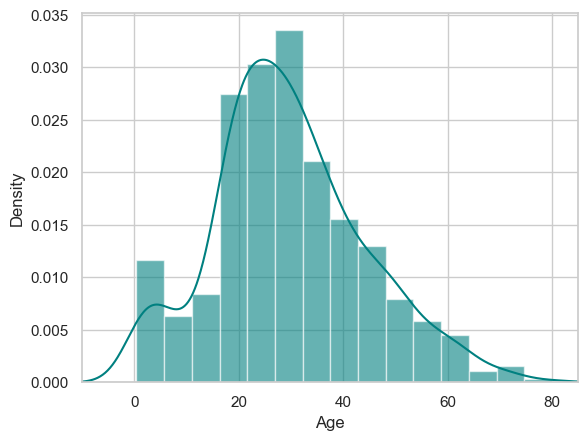

In [8]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Imputation: techniques to fill missing values

Since "Age" is left skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [9]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [11]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [12]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

In [13]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's with "S".

In [14]:
train_data = train_df.copy()
#filling the age col with median
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
#filling the embarked col with the most popular value
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
#dropping cabin
train_data.drop('Cabin', axis=1, inplace=True)

In [15]:
#sanity check for missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great!

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


I'll also create numerical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked").

In [19]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,False,False,True,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,True,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,False,False,True,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,True,False,False,False,False,True,True,False
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,False,False,True,False,False,True,False,True


In [20]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


####  Exploration of Age

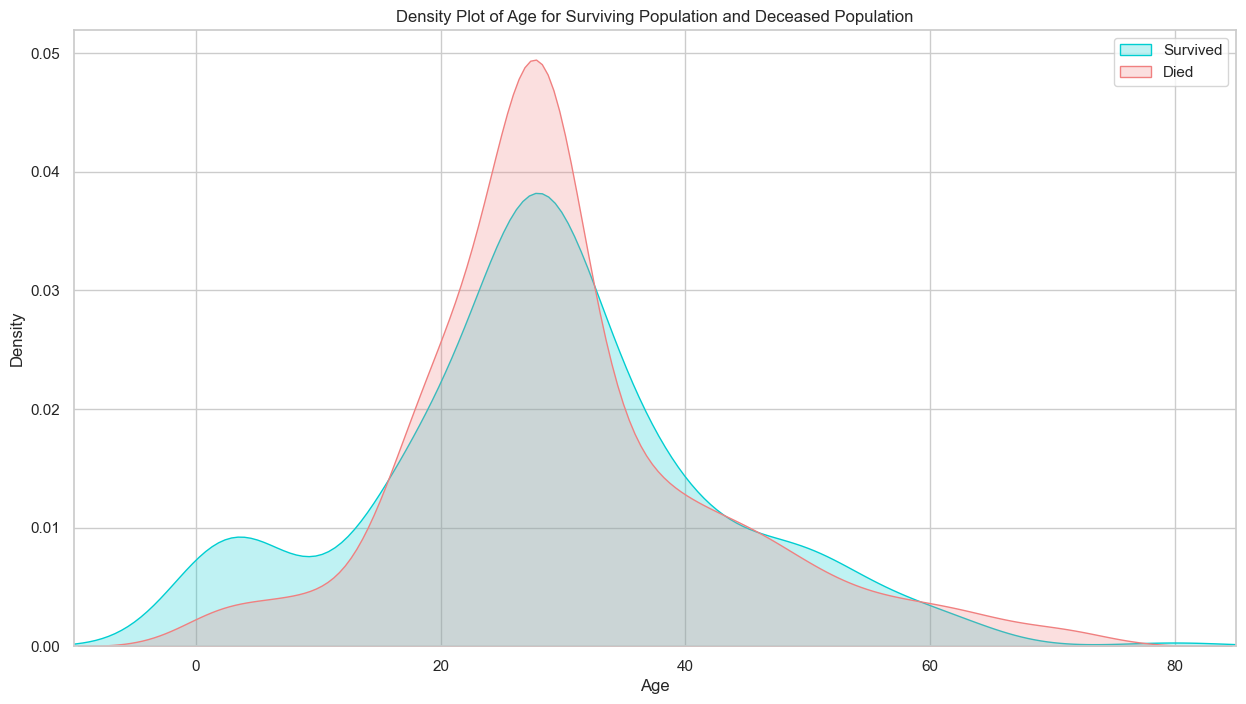

In [21]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [22]:
final_train['IsMinor']=np.where(final_train['Age']<=17, 1, 0)



final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,0,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,1,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,0,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,1,False,False,True,False,False,True,True,0


###  Logistic Regression and Results

**Recursive feature elimination**

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [23]:
final_train.head()


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,0,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,1,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,0,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,1,False,False,True,False,False,True,True,0


In [24]:
from sklearn.linear_model import LogisticRegression
#recursive feature elimination
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']


# Build a logreg and compute the feature importances
model = LogisticRegression()

# create the RFE model and select 5 attributes
rfe = RFE(model, n_features_to_select  =6)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


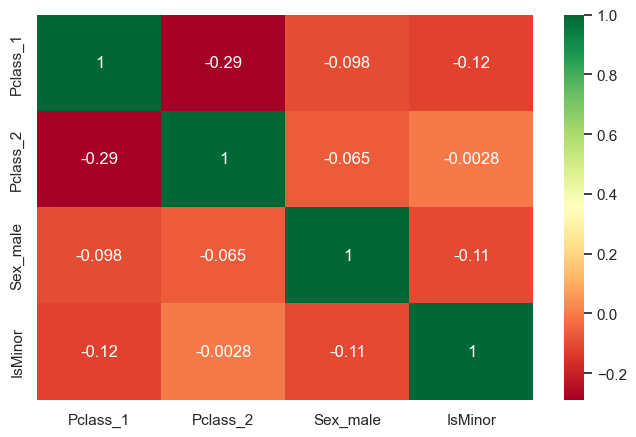

In [25]:
Selected_features = ['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']

X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Review of model evaluation procedures
Motivation: Need a way to choose between machine learning models

Goal is to estimate likely performance of a model on out-of-sample data
Initial idea: Train and test on the same data

But, maximizing training accuracy rewards overly complex models which overfit the training data
Alternative idea: Train/test split

Split the dataset into two pieces, so that the model can be trained and tested on different data
Testing accuracy is a better estimate than training accuracy of out-of-sample performance
Problem with train/test split
It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
Testing accuracy can change a lot depending on a which observation happen to be in the testing set


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))


Train/Test split results:
LogisticRegression accuracy is 0.771


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_test, y_pred)

0.22905027932960895